# Training Encoder Decoder Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/6156 Project/eng_jpn.txt',sep='\t',names=['Japanese','English']) 

In [ ]:
df.head()

,Japanese,English
0,行け。,Go.
1,行きなさい。,Go.
2,こんにちは。,Hi.
3,もしもし。,Hi.
4,やっほー。,Hi.


In [ ]:
df.Japanese = df.Japanese.apply(lambda x: 'sos '+ x +' eos')

In [ ]:
jap_vocab= set()
for sent in df.Japanese:
    for word in sent.split():
        if word not in jap_vocab:
            jap_vocab.add(word)

In [ ]:
eng_vocab= set()
for sent in df.English:
    for word in sent.split():
        if word not in eng_vocab:
            eng_vocab.add(word)

In [ ]:
len(jap_vocab), len(eng_vocab), 

(52194, 18524)

In [ ]:
JAP_VOCAB_SIZE= len(jap_vocab)+1
ENG_VOCAB_SIZE= len(eng_vocab)+1
print(JAP_VOCAB_SIZE)
print(ENG_VOCAB_SIZE)


52195
18525


In [ ]:
jap_words = sorted(list(jap_vocab))
eng_words = sorted(list(eng_vocab))

In [ ]:
# create japanese and english dictionaries
jap_word_index = dict((w, i) for i, w in enumerate(jap_words))
eng_word_index = dict((w, i) for i, w in enumerate(eng_words))

In [ ]:
jap_word_index

{'"password"': 0,
 '100ドルまで使っていいですよ。': 1,
 '10時の約束なのに、未だに何の連絡もないのはおかしいな。どこかで事故にでも遭ったんじゃないだろうか。': 2,
 '10時まで仕事するつもりなの？': 3,
 '10月20日の昼の２時半はどうかしら？': 4,
 '10月20日午後２時３０分はどう？': 5,
 '10月からトムを見かけてないよ。': 6,
 '10月にまた会おう。': 7,
 '10月にトムと会った。': 8,
 '10月に僕はここにいなかった。': 9,
 '10月に君らにまた会うのを待ちきれない。': 10,
 '10月の最初の週に、ボストンに行くよ。': 11,
 '10月はボストンにいた。': 12,
 '10月以来、トムとは会ってないよ。': 13,
 '12時45分とかどう？': 14,
 '12時から1時まで、1時間の昼休みがある。': 15,
 '12時間寝たのにまだ眠い。': 16,
 '12月24日はクリスマスイブです。': 17,
 '12歳です。': 18,
 '16歳以下の子供を車に乗せて喫煙することは法律違反です。': 19,
 '1853年、ペリーはついに東京湾へ入港した。': 20,
 '1912年、タイタニック号は処女航海中に沈没した。': 21,
 '1941年に戦争が始まった。': 22,
 '1959年9月26日に、日本観測史上最大の台風が名古屋を襲った。': 23,
 '1962年にアルジェリアはフランスから独立した。': 24,
 '19時までに投函すれば、明日には届きますよ。': 25,
 '1つ分からないことがあります。': 26,
 '1人でいるの？': 27,
 '1分は60秒です。': 28,
 '1年間の留学でトムのフランス語力は飛躍的に向上した。': 29,
 '1日5語ずつ英単語を覚えれば、1年で1825語、100年で182620語覚えることができます。': 30,
 '1日か2日かかります。': 31,
 '1日や2日で東京を見て回るなんて出来ない。': 32,
 '1時間で終わらせます。': 33,
 '1時間は60分です。': 34,
 '1時間ほどお待ちいただけますか？': 35,
 '1月に試験を受ける予定です。': 36,
 '1番目が一番

In [ ]:
jap_index_word = dict((i, w) for i, w in enumerate(jap_words))
eng_index_word = dict((i,w) for i, w in enumerate(eng_words))

In [ ]:
eng_index_word

{0: '"4',
 1: '"About',
 2: '"Actually,',
 3: '"All',
 4: '"And',
 5: '"Anytime',
 6: '"Anywhere',
 7: '"Are',
 8: '"At',
 9: '"Because',
 10: '"Beispiel?"',
 11: '"By',
 12: '"Certainly',
 13: '"Certainly."',
 14: '"Could',
 15: '"Do',
 16: '"Don\'t',
 17: '"Everything."',
 18: '"For',
 19: '"Forgotten',
 20: '"French."',
 21: '"Friendship".',
 22: '"Get',
 23: '"Go',
 24: '"He',
 25: '"Here',
 26: '"Hold',
 27: '"How',
 28: '"I',
 29: '"I\'d',
 30: '"I\'ll',
 31: '"I\'m',
 32: '"I\'ve',
 33: '"If',
 34: '"In',
 35: '"Is',
 36: '"It',
 37: '"It\'s',
 38: '"It\'s"',
 39: '"Itch."',
 40: '"Jailhouse',
 41: '"Just',
 42: '"Keep',
 43: '"Let\'s',
 44: '"Me',
 45: '"Me,',
 46: '"Neither',
 47: '"No',
 48: '"No,',
 49: '"Not',
 50: '"Nothing',
 51: '"Nothing."',
 52: '"OK."',
 53: '"Of',
 54: '"Oh,',
 55: '"On',
 56: '"Only',
 57: '"Pretty',
 58: '"Rain,',
 59: '"Really?"',
 60: '"She',
 61: '"She\'s',
 62: '"So',
 63: '"Sorry,',
 64: '"Stay',
 65: '"Stop',
 66: '"Sure',
 67: '"Sure!"',
 68

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(df.Japanese, df.English, test_size=0.1, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56238,), (6249,), (56238,), (6249,))

In [ ]:
jap_len_list=df.Japanese.apply(lambda x: len(x.split())).to_list()

eng_len_list=df.English.apply(lambda x: len(x.split())).to_list()


In [ ]:
np.max(eng_len_list), np.max(jap_len_list)

(44, 10)

In [ ]:
BATCH_SIZE= 64
max_jap_len =  np.max(jap_len_list)
max_eng_len =  np.max(eng_len_list)

In [ ]:
max_jap_len, max_eng_len

(10, 44)

In [ ]:
def data_batch_generator(x, y, batch_size=BATCH_SIZE):
    while True:
        for i in range(0, len(x), batch_size):
            encoder_input_data = np.zeros((batch_size,max_jap_len ), dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_eng_len), dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_eng_len, ENG_VOCAB_SIZE), dtype='float32' )
            for j, (jap_text, eng_text) in enumerate(zip(x[i:i+batch_size], y[i:i+batch_size])):
                for t , word in enumerate(jap_text.split()):
                    encoder_input_data[j,t] = jap_word_index[word]
                for t, word in enumerate(eng_text.split()):
                    if t < len(eng_text.split()) - 1:
                        decoder_input_data[j,t]= eng_word_index[word]
                    if t>0:
                    
                        decoder_target_data[j,t-1, eng_word_index[word]] = 1.
            yield ([encoder_input_data, decoder_input_data], decoder_target_data)      
            

In [ ]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras import Input, Model

In [ ]:
# Eoncoder
encoder_input = Input(shape=(None, ))
encoder_embd = Embedding(JAP_VOCAB_SIZE,100, mask_zero=True)(encoder_input)
encoder_lstm = LSTM(100, return_state=True)
encoder_output,state_h, state_c = encoder_lstm(encoder_embd)

encoder_states= [state_h, state_c]

# Decoder
decoder_input = Input(shape=(None,))
decoder_embd = Embedding(ENG_VOCAB_SIZE, 100, mask_zero=True)
decoder_embedding= decoder_embd(decoder_input)
decoder_lstm = LSTM(100, return_state=True,return_sequences=True )
decoder_outputs, _, _= decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense= Dense(ENG_VOCAB_SIZE, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model1 = Model([encoder_input, decoder_input], decoder_outputs)

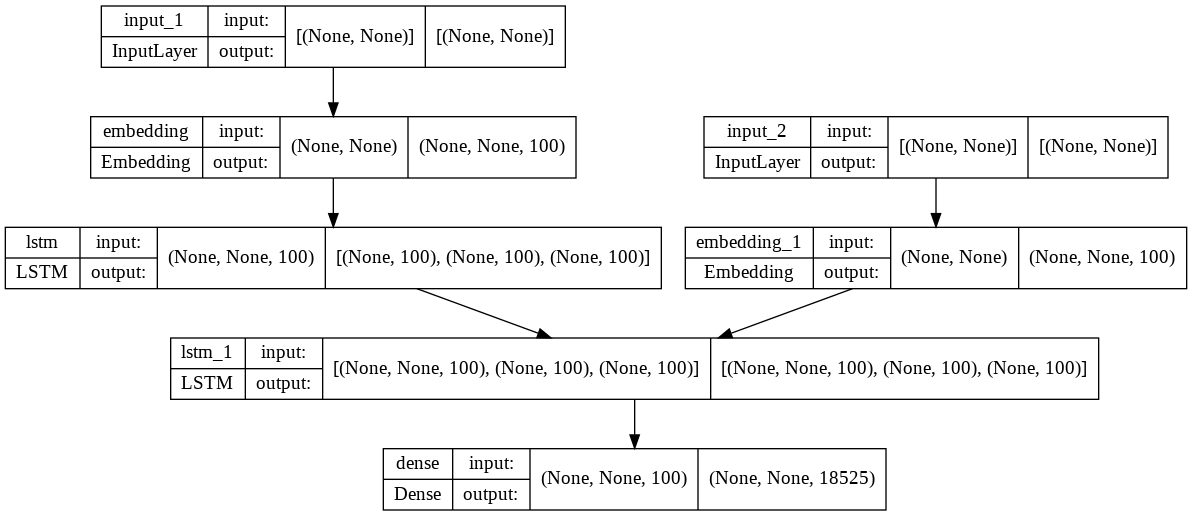

In [ ]:
from tensorflow.keras.utils import  plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
plot_model(model1,show_shapes=True)

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Bhomik - Copy/model_checkpoints/", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
steps_per_epoch= np.ceil(len(X_train)/BATCH_SIZE)
steps_per_epoch_val = np.ceil(len(X_train)/BATCH_SIZE)

In [ ]:
steps_per_epoch

879.0

In [ ]:
EPOCHS= 30 #@param {type:'slider',min:10,max:100, step:10 }
EPOCHS

30

In [ ]:
history1= model1.fit(data_batch_generator(X_train,y_train), 
                       epochs=EPOCHS,
                       steps_per_epoch= steps_per_epoch,
                     validation_data=data_batch_generator(X_test, y_test, BATCH_SIZE),
                       validation_steps=steps_per_epoch_val,
                     callbacks=callbacks_list)

Epoch 1/30
879/879 [==============================] - ETA: 0s - loss: 0.8545 - accuracy: 0.0699

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 317s 348ms/step - loss: 0.8545 - accuracy: 0.0699 - val_loss: 0.7939 - val_accuracy: 0.1010
Epoch 2/30
879/879 [==============================] - ETA: 0s - loss: 0.7440 - accuracy: 0.1242

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 300s 342ms/step - loss: 0.7440 - accuracy: 0.1242 - val_loss: 0.7357 - val_accuracy: 0.1374
Epoch 3/30
879/879 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.1537

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 307s 349ms/step - loss: 0.6912 - accuracy: 0.1537 - val_loss: 0.7032 - val_accuracy: 0.1577
Epoch 4/30
879/879 [==============================] - ETA: 0s - loss: 0.6554 - accuracy: 0.1721

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 304s 346ms/step - loss: 0.6554 - accuracy: 0.1721 - val_loss: 0.6823 - val_accuracy: 0.1712
Epoch 5/30
879/879 [==============================] - ETA: 0s - loss: 0.6248 - accuracy: 0.1894

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 305s 347ms/step - loss: 0.6248 - accuracy: 0.1894 - val_loss: 0.6687 - val_accuracy: 0.1791
Epoch 6/30
879/879 [==============================] - ETA: 0s - loss: 0.5980 - accuracy: 0.2065

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 304s 346ms/step - loss: 0.5980 - accuracy: 0.2065 - val_loss: 0.6588 - val_accuracy: 0.1846
Epoch 7/30
879/879 [==============================] - ETA: 0s - loss: 0.5743 - accuracy: 0.2220

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 305s 347ms/step - loss: 0.5743 - accuracy: 0.2220 - val_loss: 0.6517 - val_accuracy: 0.1888
Epoch 8/30
879/879 [==============================] - ETA: 0s - loss: 0.5530 - accuracy: 0.2357

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 305s 348ms/step - loss: 0.5530 - accuracy: 0.2357 - val_loss: 0.6471 - val_accuracy: 0.1883
Epoch 9/30
879/879 [==============================] - ETA: 0s - loss: 0.5337 - accuracy: 0.2481

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 311s 354ms/step - loss: 0.5337 - accuracy: 0.2481 - val_loss: 0.6434 - val_accuracy: 0.1913
Epoch 10/30
879/879 [==============================] - ETA: 0s - loss: 0.5151 - accuracy: 0.2608

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 311s 354ms/step - loss: 0.5151 - accuracy: 0.2608 - val_loss: 0.6421 - val_accuracy: 0.1943
Epoch 11/30
879/879 [==============================] - ETA: 0s - loss: 0.4964 - accuracy: 0.2754

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 312s 355ms/step - loss: 0.4964 - accuracy: 0.2754 - val_loss: 0.6428 - val_accuracy: 0.1962
Epoch 12/30
879/879 [==============================] - ETA: 0s - loss: 0.4781 - accuracy: 0.2923

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 312s 355ms/step - loss: 0.4781 - accuracy: 0.2923 - val_loss: 0.6437 - val_accuracy: 0.1996
Epoch 13/30
879/879 [==============================] - ETA: 0s - loss: 0.4605 - accuracy: 0.3095

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 314s 357ms/step - loss: 0.4605 - accuracy: 0.3095 - val_loss: 0.6448 - val_accuracy: 0.2017
Epoch 14/30
879/879 [==============================] - ETA: 0s - loss: 0.4438 - accuracy: 0.3271

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 315s 358ms/step - loss: 0.4438 - accuracy: 0.3271 - val_loss: 0.6498 - val_accuracy: 0.2005
Epoch 15/30
879/879 [==============================] - ETA: 0s - loss: 0.4278 - accuracy: 0.3442

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 316s 360ms/step - loss: 0.4278 - accuracy: 0.3442 - val_loss: 0.6513 - val_accuracy: 0.2038
Epoch 16/30
879/879 [==============================] - ETA: 0s - loss: 0.4129 - accuracy: 0.3610

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 315s 359ms/step - loss: 0.4129 - accuracy: 0.3610 - val_loss: 0.6578 - val_accuracy: 0.2033
Epoch 17/30
879/879 [==============================] - ETA: 0s - loss: 0.3987 - accuracy: 0.3781

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 317s 361ms/step - loss: 0.3987 - accuracy: 0.3781 - val_loss: 0.6626 - val_accuracy: 0.2040
Epoch 18/30
879/879 [==============================] - ETA: 0s - loss: 0.3850 - accuracy: 0.3953

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 315s 358ms/step - loss: 0.3850 - accuracy: 0.3953 - val_loss: 0.6646 - val_accuracy: 0.2073
Epoch 19/30
879/879 [==============================] - ETA: 0s - loss: 0.3711 - accuracy: 0.4126

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 316s 360ms/step - loss: 0.3711 - accuracy: 0.4126 - val_loss: 0.6721 - val_accuracy: 0.2056
Epoch 20/30
879/879 [==============================] - ETA: 0s - loss: 0.3576 - accuracy: 0.4301

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 315s 359ms/step - loss: 0.3576 - accuracy: 0.4301 - val_loss: 0.6790 - val_accuracy: 0.2061
Epoch 21/30
879/879 [==============================] - ETA: 0s - loss: 0.3444 - accuracy: 0.4483

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 316s 360ms/step - loss: 0.3444 - accuracy: 0.4483 - val_loss: 0.6824 - val_accuracy: 0.2094
Epoch 22/30
879/879 [==============================] - ETA: 0s - loss: 0.3314 - accuracy: 0.4657

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 315s 359ms/step - loss: 0.3314 - accuracy: 0.4657 - val_loss: 0.6889 - val_accuracy: 0.2071
Epoch 23/30
879/879 [==============================] - ETA: 0s - loss: 0.3187 - accuracy: 0.4846

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 317s 361ms/step - loss: 0.3187 - accuracy: 0.4846 - val_loss: 0.7013 - val_accuracy: 0.2057
Epoch 24/30
879/879 [==============================] - ETA: 0s - loss: 0.3069 - accuracy: 0.5011

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 315s 359ms/step - loss: 0.3069 - accuracy: 0.5011 - val_loss: 0.7046 - val_accuracy: 0.2094
Epoch 25/30
879/879 [==============================] - ETA: 0s - loss: 0.2962 - accuracy: 0.5174

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 318s 362ms/step - loss: 0.2962 - accuracy: 0.5174 - val_loss: 0.7071 - val_accuracy: 0.2106
Epoch 26/30
879/879 [==============================] - ETA: 0s - loss: 0.2857 - accuracy: 0.5312

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 316s 359ms/step - loss: 0.2857 - accuracy: 0.5312 - val_loss: 0.7153 - val_accuracy: 0.2077
Epoch 27/30
879/879 [==============================] - ETA: 0s - loss: 0.2757 - accuracy: 0.5468

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 317s 361ms/step - loss: 0.2757 - accuracy: 0.5468 - val_loss: 0.7269 - val_accuracy: 0.2075
Epoch 28/30
879/879 [==============================] - ETA: 0s - loss: 0.2665 - accuracy: 0.5604

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 315s 359ms/step - loss: 0.2665 - accuracy: 0.5604 - val_loss: 0.7295 - val_accuracy: 0.2120
Epoch 29/30
879/879 [==============================] - ETA: 0s - loss: 0.2574 - accuracy: 0.5751

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 317s 361ms/step - loss: 0.2574 - accuracy: 0.5751 - val_loss: 0.7372 - val_accuracy: 0.2119
Epoch 30/30
879/879 [==============================] - ETA: 0s - loss: 0.2483 - accuracy: 0.5889

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/assets


879/879 [==============================] - 315s 359ms/step - loss: 0.2483 - accuracy: 0.5889 - val_loss: 0.7476 - val_accuracy: 0.2089


In [ ]:
model1.save_weights('/content/drive/MyDrive/6156 Project/model1_weights.h5')

In [ ]:
model1.load_weights('/content/drive/MyDrive/6156 Project/model1_weights.h5')

In [ ]:
# Eoncoder
encoder_input = Input(shape=(None, ))
encoder_embd = Embedding(JAP_VOCAB_SIZE,1000, mask_zero=True)(encoder_input)
encoder_lstm = LSTM(250, return_state=True)
encoder_output,state_h, state_c = encoder_lstm(encoder_embd)

encoder_states= [state_h, state_c]

# Decoder
decoder_input = Input(shape=(None,))
decoder_embd = Embedding(ENG_VOCAB_SIZE, 1000, mask_zero=True)
decoder_embedding= decoder_embd(decoder_input)
decoder_lstm = LSTM(250, return_state=True,return_sequences=True )
decoder_outputs, _, _= decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense= Dense(ENG_VOCAB_SIZE, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model2 = Model([encoder_input, decoder_input], decoder_outputs)

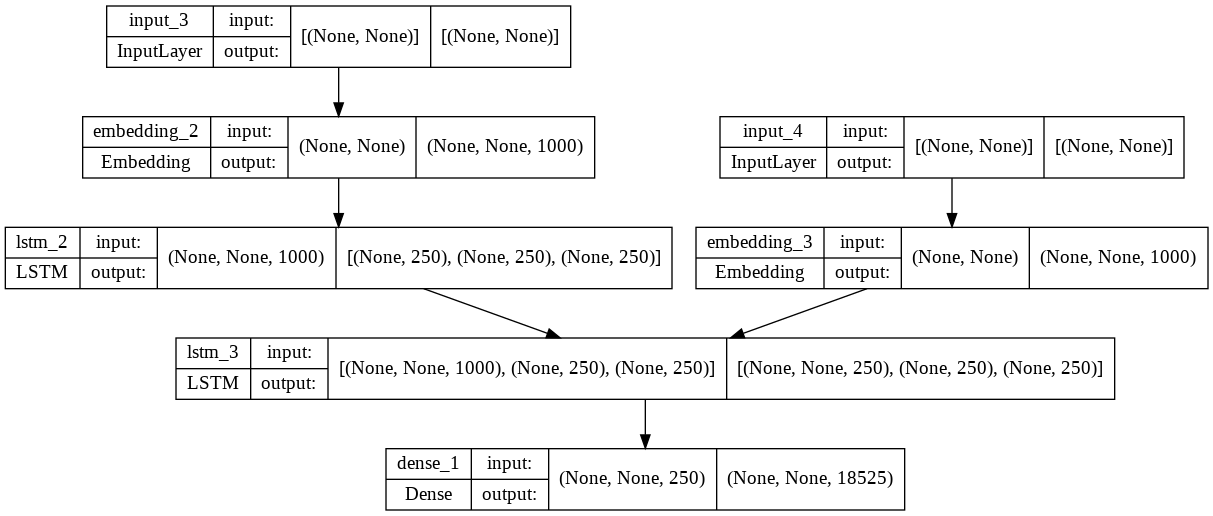

In [ ]:
from tensorflow.keras.utils import  plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
plot_model(model2,show_shapes=True)

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/6156 Project/model_checkpoints/model2/", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
steps_per_epoch= np.ceil(len(X_train)/BATCH_SIZE)
steps_per_epoch_val = np.ceil(len(X_train)/BATCH_SIZE)

In [ ]:
EPOCHS= 30 #@param {type:'slider',min:10,max:100, step:10 }
EPOCHS

30

In [ ]:
history2= model2.fit(data_batch_generator(X_train,y_train), 
                       epochs=EPOCHS,
                       steps_per_epoch= steps_per_epoch,
                     validation_data=data_batch_generator(X_test, y_test, BATCH_SIZE),
                       validation_steps=steps_per_epoch_val,
                     callbacks=callbacks_list)

Epoch 1/30
879/879 [==============================] - ETA: 0s - loss: 0.7905 - accuracy: 0.1106

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 356s 397ms/step - loss: 0.7905 - accuracy: 0.1106 - val_loss: 0.7095 - val_accuracy: 0.1548
Epoch 2/30
879/879 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.1775

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 343s 390ms/step - loss: 0.6523 - accuracy: 0.1775 - val_loss: 0.6534 - val_accuracy: 0.1873
Epoch 3/30
879/879 [==============================] - ETA: 0s - loss: 0.5887 - accuracy: 0.2088

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 341s 388ms/step - loss: 0.5887 - accuracy: 0.2088 - val_loss: 0.6237 - val_accuracy: 0.2054
Epoch 4/30
879/879 [==============================] - ETA: 0s - loss: 0.5395 - accuracy: 0.2371

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 342s 389ms/step - loss: 0.5395 - accuracy: 0.2371 - val_loss: 0.6053 - val_accuracy: 0.2175
Epoch 5/30
879/879 [==============================] - ETA: 0s - loss: 0.4989 - accuracy: 0.2635

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 345s 393ms/step - loss: 0.4989 - accuracy: 0.2635 - val_loss: 0.5937 - val_accuracy: 0.2283
Epoch 6/30
879/879 [==============================] - ETA: 0s - loss: 0.4605 - accuracy: 0.2945

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 356s 405ms/step - loss: 0.4605 - accuracy: 0.2945 - val_loss: 0.5878 - val_accuracy: 0.2355
Epoch 7/30
879/879 [==============================] - ETA: 0s - loss: 0.4208 - accuracy: 0.3341

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 352s 401ms/step - loss: 0.4208 - accuracy: 0.3341 - val_loss: 0.5884 - val_accuracy: 0.2412
Epoch 8/30
879/879 [==============================] - ETA: 0s - loss: 0.3786 - accuracy: 0.3864

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 353s 401ms/step - loss: 0.3786 - accuracy: 0.3864 - val_loss: 0.5906 - val_accuracy: 0.2466
Epoch 9/30
879/879 [==============================] - ETA: 0s - loss: 0.3333 - accuracy: 0.4475

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 350s 398ms/step - loss: 0.3333 - accuracy: 0.4475 - val_loss: 0.5984 - val_accuracy: 0.2474
Epoch 10/30
879/879 [==============================] - ETA: 0s - loss: 0.2892 - accuracy: 0.5126

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 350s 399ms/step - loss: 0.2892 - accuracy: 0.5126 - val_loss: 0.6110 - val_accuracy: 0.2504
Epoch 11/30
879/879 [==============================] - ETA: 0s - loss: 0.2492 - accuracy: 0.5775

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 352s 401ms/step - loss: 0.2492 - accuracy: 0.5775 - val_loss: 0.6257 - val_accuracy: 0.2557
Epoch 12/30
879/879 [==============================] - ETA: 0s - loss: 0.2132 - accuracy: 0.6381

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 354s 403ms/step - loss: 0.2132 - accuracy: 0.6381 - val_loss: 0.6360 - val_accuracy: 0.2610
Epoch 13/30
879/879 [==============================] - ETA: 0s - loss: 0.1811 - accuracy: 0.6944

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 352s 401ms/step - loss: 0.1811 - accuracy: 0.6944 - val_loss: 0.6499 - val_accuracy: 0.2620
Epoch 14/30
879/879 [==============================] - ETA: 0s - loss: 0.1536 - accuracy: 0.7434

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 353s 402ms/step - loss: 0.1536 - accuracy: 0.7434 - val_loss: 0.6672 - val_accuracy: 0.2647
Epoch 15/30
879/879 [==============================] - ETA: 0s - loss: 0.1299 - accuracy: 0.7850

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 352s 400ms/step - loss: 0.1299 - accuracy: 0.7850 - val_loss: 0.6811 - val_accuracy: 0.2657
Epoch 16/30
879/879 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.8193

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 353s 402ms/step - loss: 0.1098 - accuracy: 0.8193 - val_loss: 0.6903 - val_accuracy: 0.2702
Epoch 17/30
879/879 [==============================] - ETA: 0s - loss: 0.0930 - accuracy: 0.8479

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 353s 402ms/step - loss: 0.0930 - accuracy: 0.8479 - val_loss: 0.7087 - val_accuracy: 0.2703
Epoch 18/30
879/879 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.8724

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 359s 409ms/step - loss: 0.0785 - accuracy: 0.8724 - val_loss: 0.7208 - val_accuracy: 0.2720
Epoch 19/30
879/879 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.8909

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 352s 400ms/step - loss: 0.0667 - accuracy: 0.8909 - val_loss: 0.7305 - val_accuracy: 0.2737
Epoch 20/30
879/879 [==============================] - ETA: 0s - loss: 0.0566 - accuracy: 0.9076

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 353s 402ms/step - loss: 0.0566 - accuracy: 0.9076 - val_loss: 0.7432 - val_accuracy: 0.2724
Epoch 21/30
879/879 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9214

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 351s 399ms/step - loss: 0.0482 - accuracy: 0.9214 - val_loss: 0.7569 - val_accuracy: 0.2683
Epoch 22/30
879/879 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9320

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 354s 403ms/step - loss: 0.0413 - accuracy: 0.9320 - val_loss: 0.7693 - val_accuracy: 0.2704
Epoch 23/30
879/879 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9402

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 352s 401ms/step - loss: 0.0358 - accuracy: 0.9402 - val_loss: 0.7842 - val_accuracy: 0.2710
Epoch 24/30
879/879 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9485

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhomik - Copy/model_checkpoints/model2/assets


879/879 [==============================] - 359s 408ms/step - loss: 0.0309 - accuracy: 0.9485 - val_loss: 0.7975 - val_accuracy: 0.2727


In [ ]:
model2.save_weights('/content/drive/MyDrive/6156 Project/2_model_weights.h5')

In [ ]:
model2.load_weights('/content/drive/MyDrive/6156 Project/2_model_weights.h5')

In [ ]:
encoder_model = Model(encoder_input, encoder_states)

In [ ]:
decoder_state_input_h = Input(shape=(250,))
decoder_state_input_c= Input(shape=(250,))
decoder_states_input= [decoder_state_input_h, decoder_state_input_c]

dec_embd2 = decoder_embd(decoder_input)

decoder_output2,state_h2, state_c2 = decoder_lstm(dec_embd2, initial_state=decoder_states_input)
deccoder_states2= [state_h2, state_c2]

decoder_output2 = decoder_dense(decoder_output2)

decoder_model = Model(
                      [decoder_input]+decoder_states_input,
                      [decoder_output2]+ deccoder_states2)

In [ ]:
def get_predicted_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    
    target_seq = np.zeros((1,1))
    
    target_seq[0, 0] = jap_word_index['sos']
    
   
    stop_condition = False
    decoded_sentence = ''
    
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = eng_index_word[sampled_token_index]
        decoded_sentence += ' '+sampled_char
        
        if (sampled_char == 'eos' or len(decoded_sentence) > 50):
            stop_condition = True
        
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        states_value = [h, c]
    
    return decoded_sentence

In [ ]:
test_gen= data_batch_generator(X_test,y_test,batch_size=1)


In [ ]:
Actual_test_sent = X_test.to_list()
Actual_test_trans= y_test.to_list()

In [ ]:
test_inputs=[]
test_outputs=[]

In [ ]:
from tqdm.notebook import tqdm_notebook
import time
for (input, output),_ in tqdm_notebook(iter(test_gen)):
    test_inputs.append(input)
    test_outputs.append(output)
    time.sleep(0.5) 

0it [00:00, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
test_inputs[0]

array([[  117., 38951.,   109.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]], dtype=float32)

In [ ]:
test_inputs[1]

array([[ 117., 2032.,  109.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]], dtype=float32)

In [ ]:
print("Japanese Sentece:", Actual_test_sent[0])
print("Actual English Sentence:", Actual_test_trans[0])
print("Predicted English Translation:", get_predicted_sentence(test_inputs[0]))


Japanese Sentece: sos 明日また来なさい。 eos
Actual English Sentence: Come again tomorrow.
Predicted English Translation:  more fun than Tom thinks of what he's saying. than


In [ ]:
print("Japanese Sentece:", Actual_test_sent[3])
print("Actual English Sentence:", Actual_test_trans[3])
print("Predicted English Translation:", get_predicted_sentence(test_inputs[3]))


Japanese Sentece: sos 私たちは彼らが外出するのを見た。 eos
Actual English Sentence: We saw them leave.
Predicted English Translation:  more fun than Tom thinks of what he's saying. than


In [ ]:
print("Japanese Sentece:", Actual_test_sent[6])
print("Actual English Sentence:", Actual_test_trans[6])
print("Predicted English Translation:", get_predicted_sentence(test_inputs[6]))


Japanese Sentece: sos トムは何でまだ学校にいるの？ eos
Actual English Sentence: Why is Tom still at school?
Predicted English Translation:  more fun than Tom thinks of what he's saying. than


In [ ]:
print("Japanese Sentece:", Actual_test_sent[10])

Japanese Sentece: sos トムが家まで後をつけてメアリーを殺したと彼らは思っている。 eos


In [ ]:
print("Actual English Sentence:", Actual_test_trans[10])


Actual English Sentence: They think Tom followed Mary home and killed her.


In [ ]:
print("Predicted English Translation:", get_predicted_sentence(test_inputs[10]))


Predicted English Translation:  think that Tom followed Mary home and killed her. I


In [ ]:
print("Japanese Sentece:", Actual_test_sent[21])
print("Actual English Sentence:", Actual_test_trans[21])
print("Predicted English Translation:", get_predicted_sentence(test_inputs[21]))

Japanese Sentece: sos 彼は大学の外に住んでいる。 eos
Actual English Sentence: He lives off campus.
Predicted English Translation:  more fun than Tom thinks of what he's saying. than


In [ ]:
print("Japanese Sentece:", Actual_test_sent[24])
print("Actual English Sentence:", Actual_test_trans[24])
print("Predicted English Translation:", get_predicted_sentence(test_inputs[24]))

Japanese Sentece: sos 彼は眠っているふりをした。 eos
Actual English Sentence: He pretended to be sleeping.
Predicted English Translation:  more fun to do than to tell the truth or not. as I
